In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline

In [3]:
blocks = pd.read_csv(r"C:\Users\Fatih GÜLTÜRK\Desktop\census_block_loc.csv")
census = pd.read_csv(r"C:\Users\Fatih GÜLTÜRK\Desktop\nyc_census_tracts.csv",index_col=0)


In [4]:
blocks.head()

,Latitude,Longitude,BlockCode,County,State
0,40.48,-74.280000,340230076002012,Middlesex,NJ
1,40.48,-74.276834,340230076005000,Middlesex,NJ
2,40.48,-74.273668,340230076003018,Middlesex,NJ
3,40.48,-74.270503,340230076003004,Middlesex,NJ
4,40.48,-74.267337,340230074021000,Middlesex,NJ


In [5]:
census.head()

,County,Borough,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
CensusTract,,,,,,,,,,,,,,,,,,,,,
36005000100,Bronx,Bronx,7703,7133,570,29.9,6.1,60.9,0.2,1.6,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
36005000200,Bronx,Bronx,5403,2659,2744,75.8,2.3,16.0,0.0,4.2,...,2.9,0.0,0.0,43.0,2308,80.8,16.2,2.9,0.0,7.7
36005000400,Bronx,Bronx,5915,2896,3019,62.7,3.6,30.7,0.0,0.3,...,1.4,0.5,2.1,45.0,2675,71.7,25.3,2.5,0.6,9.5
36005001600,Bronx,Bronx,5879,2558,3321,65.1,1.6,32.4,0.0,0.0,...,8.6,1.6,1.7,38.8,2120,75.0,21.3,3.8,0.0,8.7
36005001900,Bronx,Bronx,2591,1206,1385,55.4,9.0,29.0,0.0,2.1,...,3.0,2.4,6.2,45.4,1083,76.8,15.5,7.7,0.0,19.2


In [6]:
census.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2167 entries, 36005000100 to 36085990100
Data columns (total 35 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   County           2167 non-null   object 
 1   Borough          2167 non-null   object 
 2   TotalPop         2167 non-null   int64  
 3   Men              2167 non-null   int64  
 4   Women            2167 non-null   int64  
 5   Hispanic         2128 non-null   float64
 6   White            2128 non-null   float64
 7   Black            2128 non-null   float64
 8   Native           2128 non-null   float64
 9   Asian            2128 non-null   float64
 10  Citizen          2167 non-null   int64  
 11  Income           2101 non-null   float64
 12  IncomeErr        2101 non-null   float64
 13  IncomePerCap     2121 non-null   float64
 14  IncomePerCapErr  2121 non-null   float64
 15  Poverty          2125 non-null   float64
 16  ChildPoverty     2107 non-null   float64
 1

In [7]:
print(census.isnull().sum())

County              0
Borough             0
TotalPop            0
Men                 0
Women               0
Hispanic           39
White              39
Black              39
Native             39
Asian              39
Citizen             0
Income             66
IncomeErr          66
IncomePerCap       46
IncomePerCapErr    46
Poverty            42
ChildPoverty       60
Professional       43
Service            43
Office             43
Construction       43
Production         43
Drive              43
Carpool            43
Transit            43
Walk               43
OtherTransp        43
WorkAtHome         43
MeanCommute        61
Employed            0
PrivateWork        43
PublicWork         43
SelfEmployed       43
FamilyWork         43
Unemployment       42
dtype: int64


In [8]:
census.columns

Index(['County', 'Borough', 'TotalPop', 'Men', 'Women', 'Hispanic', 'White',
       'Black', 'Native', 'Asian', 'Citizen', 'Income', 'IncomeErr',
       'IncomePerCap', 'IncomePerCapErr', 'Poverty', 'ChildPoverty',
       'Professional', 'Service', 'Office', 'Construction', 'Production',
       'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp', 'WorkAtHome',
       'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork', 'SelfEmployed',
       'FamilyWork', 'Unemployment'],
      dtype='object')

In [9]:
census = census.drop(['Hispanic', 'White', 'Black', 'Native', 'Asian','Citizen','Poverty', 'ChildPoverty',
       'Professional', 'Service', 'Office', 'Construction', 'Production',
       'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp', ], 1)

In [10]:
census.columns

Index(['County', 'Borough', 'TotalPop', 'Men', 'Women', 'Income', 'IncomeErr',
       'IncomePerCap', 'IncomePerCapErr', 'WorkAtHome', 'MeanCommute',
       'Employed', 'PrivateWork', 'PublicWork', 'SelfEmployed', 'FamilyWork',
       'Unemployment'],
      dtype='object')

In [11]:
census.head()

,County,Borough,TotalPop,Men,Women,Income,IncomeErr,IncomePerCap,IncomePerCapErr,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
CensusTract,,,,,,,,,,,,,,,,,
36005000100,Bronx,Bronx,7703,7133,570,NaN,NaN,2440.0,373.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
36005000200,Bronx,Bronx,5403,2659,2744,72034.0,13991.0,22180.0,2206.0,0.0,43.0,2308,80.8,16.2,2.9,0.0,7.7
36005000400,Bronx,Bronx,5915,2896,3019,74836.0,8407.0,27700.0,2449.0,2.1,45.0,2675,71.7,25.3,2.5,0.6,9.5
36005001600,Bronx,Bronx,5879,2558,3321,32312.0,6859.0,17526.0,2945.0,1.7,38.8,2120,75.0,21.3,3.8,0.0,8.7
36005001900,Bronx,Bronx,2591,1206,1385,37936.0,3771.0,17986.0,2692.0,6.2,45.4,1083,76.8,15.5,7.7,0.0,19.2


In [12]:
print(census.isnull().sum())

County              0
Borough             0
TotalPop            0
Men                 0
Women               0
Income             66
IncomeErr          66
IncomePerCap       46
IncomePerCapErr    46
WorkAtHome         43
MeanCommute        61
Employed            0
PrivateWork        43
PublicWork         43
SelfEmployed       43
FamilyWork         43
Unemployment       42
dtype: int64


In [13]:
census.shape

(2167, 17)

In [14]:
census.dropna(how = 'any',inplace=True)

In [15]:
census.shape

(2098, 17)

In [16]:
print(census.isnull().sum())

County             0
Borough            0
TotalPop           0
Men                0
Women              0
Income             0
IncomeErr          0
IncomePerCap       0
IncomePerCapErr    0
WorkAtHome         0
MeanCommute        0
Employed           0
PrivateWork        0
PublicWork         0
SelfEmployed       0
FamilyWork         0
Unemployment       0
dtype: int64


In [17]:
blocks = blocks[blocks.County.isin(['Bronx','Kings','New York','Queens','Richmond'])]
blocks['Tract'] = blocks.BlockCode // 10000
blocks = blocks.merge(census,how='left',right_index=True,left_on='Tract')

blocks.head()

,Latitude,Longitude,BlockCode,County_x,State,Tract,County_y,Borough,TotalPop,Men,...,IncomePerCap,IncomePerCapErr,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
15,40.48,-74.232513,360859901000011,Richmond,NY,36085990100,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,40.48,-74.229347,360859901000011,Richmond,NY,36085990100,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,40.48,-74.226181,360859901000011,Richmond,NY,36085990100,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,40.48,-74.223015,360859901000011,Richmond,NY,36085990100,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,40.48,-74.219849,360859901000011,Richmond,NY,36085990100,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
blocks.info()
blocks.Income = pd.to_numeric(blocks.Income,errors='coerce')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18053 entries, 15 to 37111
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Latitude         18053 non-null  float64
 1   Longitude        18053 non-null  float64
 2   BlockCode        18053 non-null  int64  
 3   County_x         18053 non-null  object 
 4   State            18053 non-null  object 
 5   Tract            18053 non-null  int64  
 6   County_y         11783 non-null  object 
 7   Borough          11783 non-null  object 
 8   TotalPop         11783 non-null  float64
 9   Men              11783 non-null  float64
 10  Women            11783 non-null  float64
 11  Income           11783 non-null  float64
 12  IncomeErr        11783 non-null  float64
 13  IncomePerCap     11783 non-null  float64
 14  IncomePerCapErr  11783 non-null  float64
 15  WorkAtHome       11783 non-null  float64
 16  MeanCommute      11783 non-null  float64
 17  Employed   

In [19]:
def convert_to_2d(lats,lons,values):
    latmin = 40.48
    lonmin = -74.28
    latmax = 40.93
    lonmax = -73.65
    lon_vals = np.mgrid[lonmin:lonmax:200j]
    lat_vals = np.mgrid[latmin:latmax:200j]
    map_values = np.zeros([200,200])
    dlat = lat_vals[1] - lat_vals[0]
    dlon = lon_vals[1] - lon_vals[0]
    for lat,lon,value in zip(lats,lons,values):
        lat_idx = int(np.rint((lat - latmin) / dlat))
        lon_idx = int(np.rint((lon-lonmin) / dlon ))        
        if not np.isnan(value):
            map_values[lon_idx,lat_idx] = value
    return lat_vals,lon_vals,map_values

In [20]:
def make_plot(data_values,title='',colors='Greens'):
    lat_vals,lon_vals,values = convert_to_2d(blocks.Latitude,blocks.Longitude,data_values)
    fig = plt.figure(1,figsize=[10,10])
    limits = np.min(lon_vals),np.max(lon_vals),np.min(lat_vals),np.max(lat_vals)
    
    im = plt.imshow(values.T,origin='lower',cmap=colors,extent=limits)
    plt.xlabel('Longitude [degrees]')
    plt.ylabel('Latitude [degrees]')
    plt.title(title)
    plt.colorbar(im,fraction=0.035, pad=0.04)
    
    plt.show()

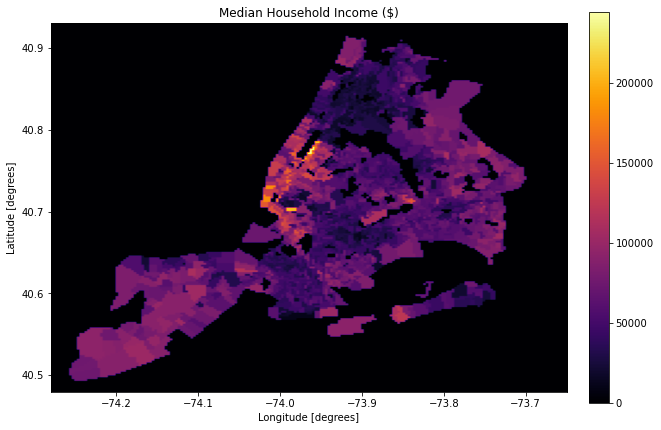

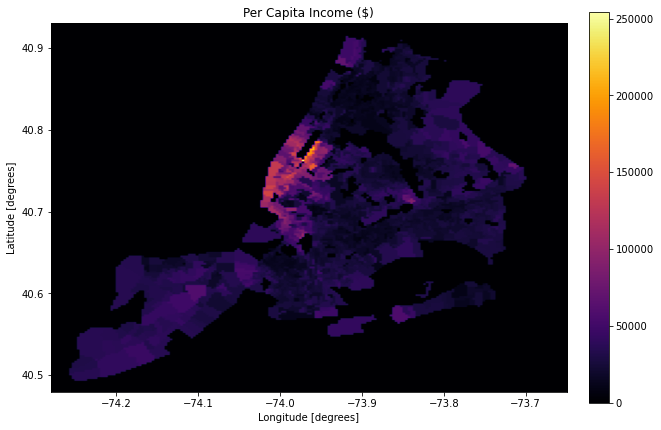

In [21]:
make_plot(blocks.Income,colors='inferno',title='Median Household Income ($)')
make_plot(blocks.IncomePerCap,colors='inferno',title='Per Capita Income ($)')

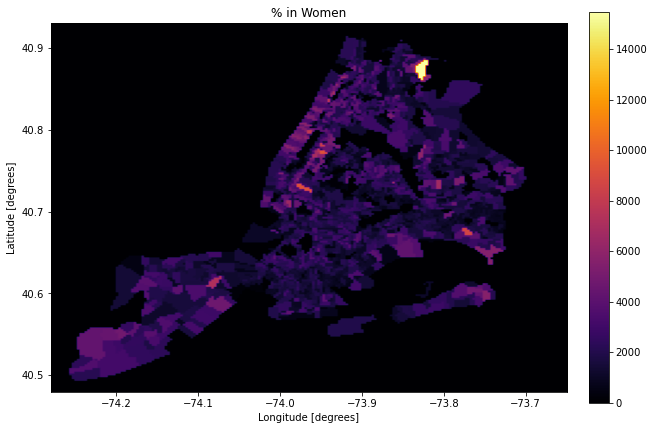

In [22]:
make_plot(blocks.Women,colors='inferno',title='% in Women')

In [23]:
census.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2098 entries, 36005000200 to 36085032300
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   County           2098 non-null   object 
 1   Borough          2098 non-null   object 
 2   TotalPop         2098 non-null   int64  
 3   Men              2098 non-null   int64  
 4   Women            2098 non-null   int64  
 5   Income           2098 non-null   float64
 6   IncomeErr        2098 non-null   float64
 7   IncomePerCap     2098 non-null   float64
 8   IncomePerCapErr  2098 non-null   float64
 9   WorkAtHome       2098 non-null   float64
 10  MeanCommute      2098 non-null   float64
 11  Employed         2098 non-null   int64  
 12  PrivateWork      2098 non-null   float64
 13  PublicWork       2098 non-null   float64
 14  SelfEmployed     2098 non-null   float64
 15  FamilyWork       2098 non-null   float64
 16  Unemployment     2098 non-null   float64
dt

In [24]:
census_women = census.groupby("Borough").sum().sort_values("Women", ascending = False).reset_index()
census_women.head(10)

,Borough,TotalPop,Men,Women,Income,IncomeErr,IncomePerCap,IncomePerCapErr,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,Brooklyn,2593160,1227027,1366133,40590155.0,8938182.0,20842249.0,3514806.0,2771.7,31333.4,1167424,58899.7,11190.6,4635.1,73.6,7469.0
1,Queens,2300325,1114860,1185465,39988088.0,8439859.0,17674408.0,2726606.0,1599.9,27494.2,1104784,50812.3,9230.8,3971.5,85.5,5601.7
2,Manhattan,1615745,761831,853914,22921786.0,5018296.0,18945851.0,3371795.0,1882.8,8469.7,876692,22861.0,2453.9,2138.8,46.4,2100.1
3,Bronx,1418542,664242,754300,12836469.0,2786146.0,6336901.0,1065349.0,1067.7,13940.8,563179,26213.2,4742.1,1705.2,39.1,4547.8
4,Staten Island,472442,228699,243743,7706272.0,1497537.0,3413896.0,478976.0,265.6,4513.8,209078,7943.2,2281.8,468.1,7.4,772.3


Text(0.5, 1.0, 'Percentage of Women According to Boroughs')

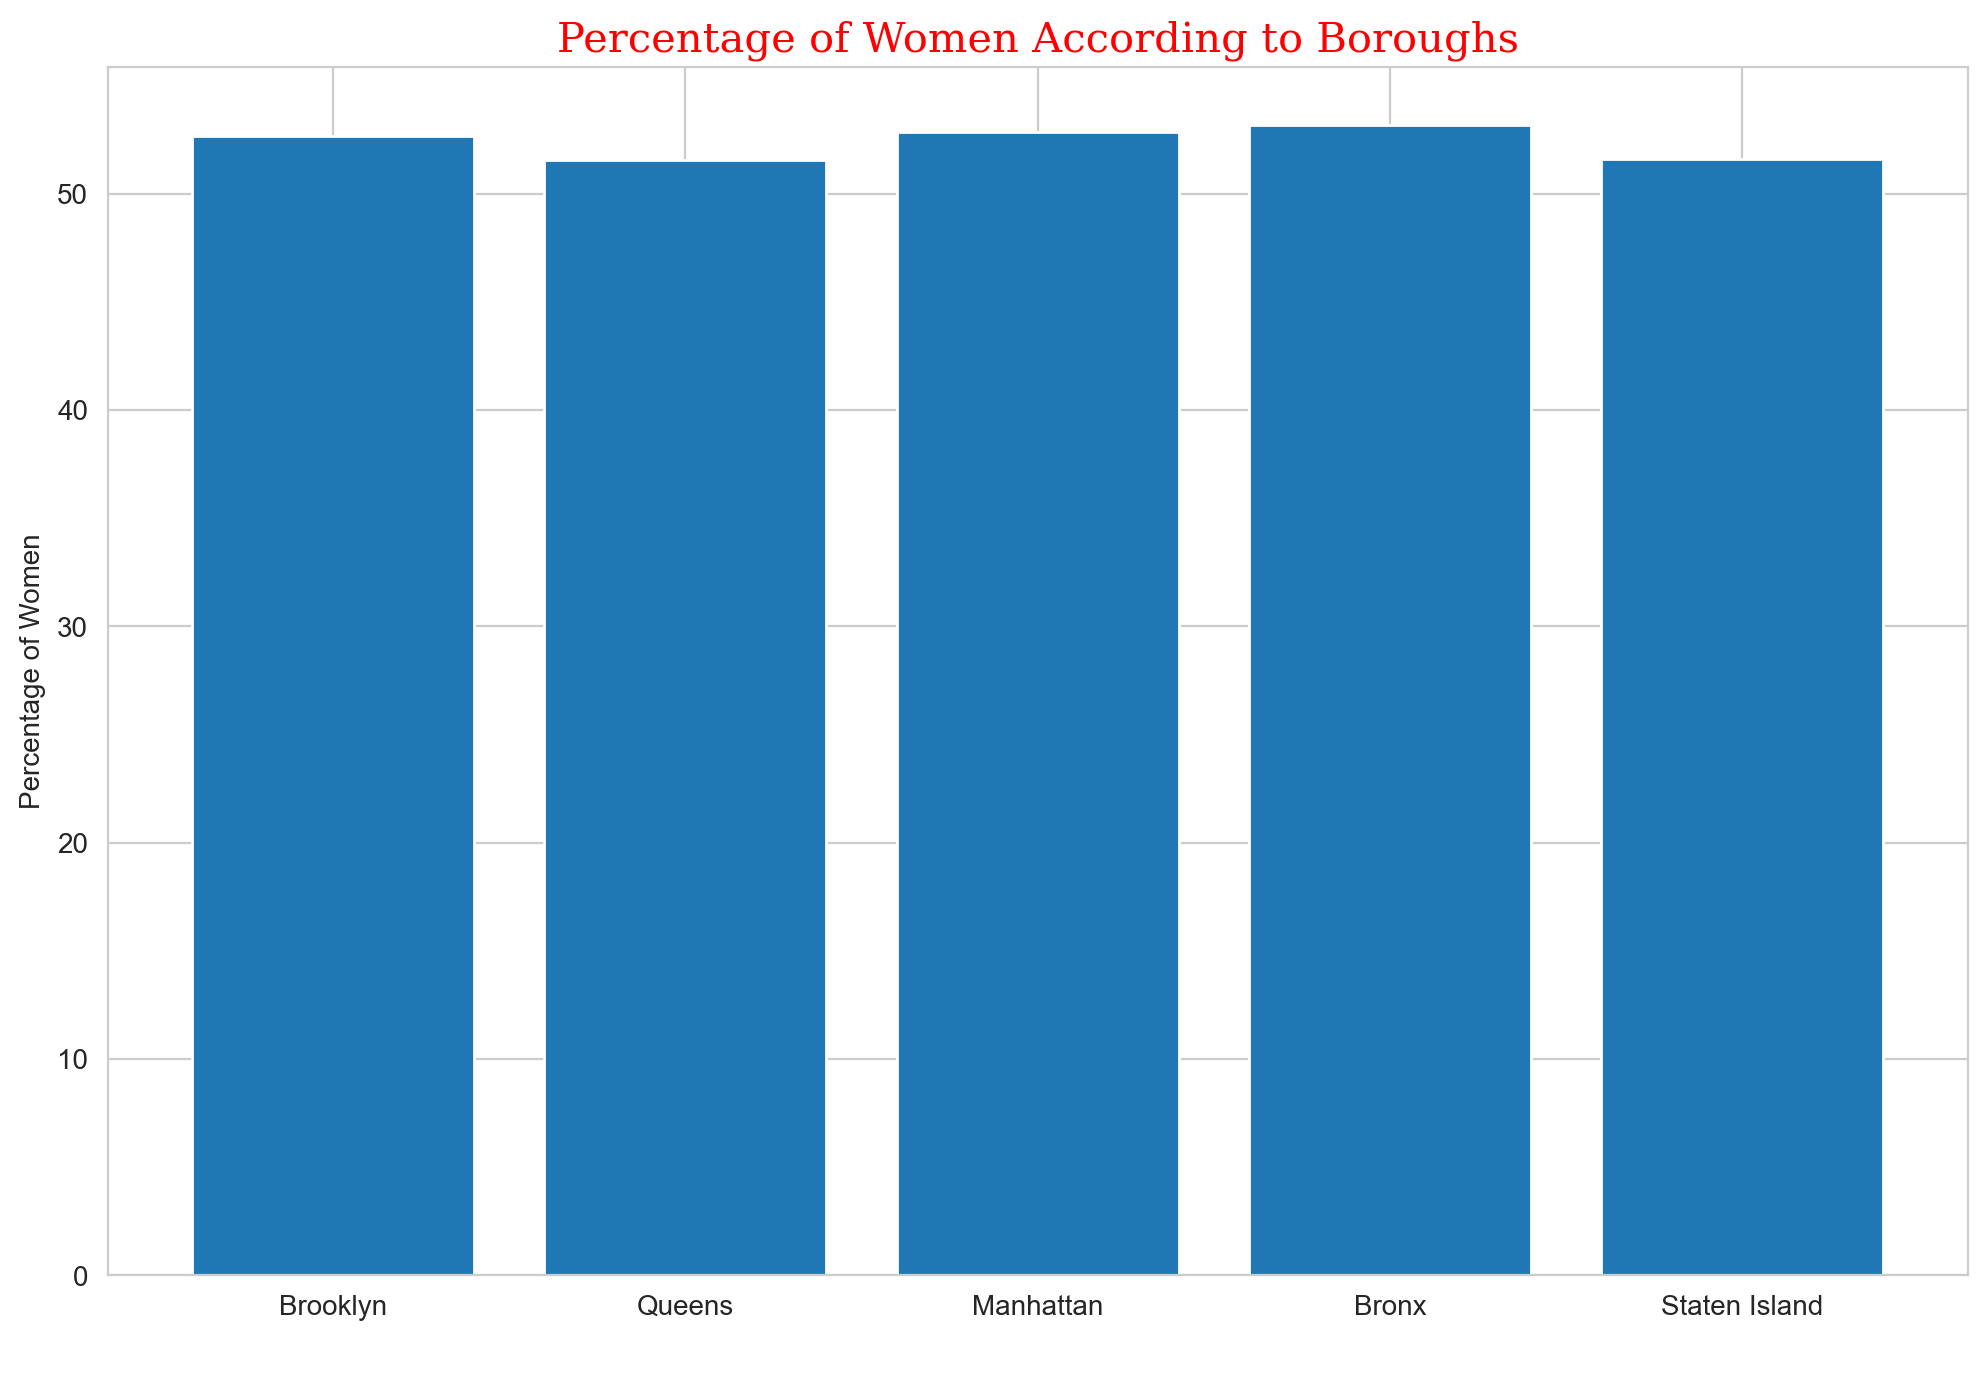

In [25]:
plt.figure(figsize=(12,8),dpi=200)
sns.set_style("whitegrid")
census_women['Women_Percentage'] = (census_women['Women']/census_women['TotalPop'])*100
plt.bar(census_women.Borough, census_women.Women_Percentage)
#plt.xticks(rotation=45, ha='right');
plt.xlabel(" ")
plt.ylabel("Percentage of Women")
plt.title("Percentage of Women According to Boroughs", family='serif',fontsize = 15,loc='center',color='r')

Text(0.5, 1.0, 'Total Number of Women According to Boroughs')

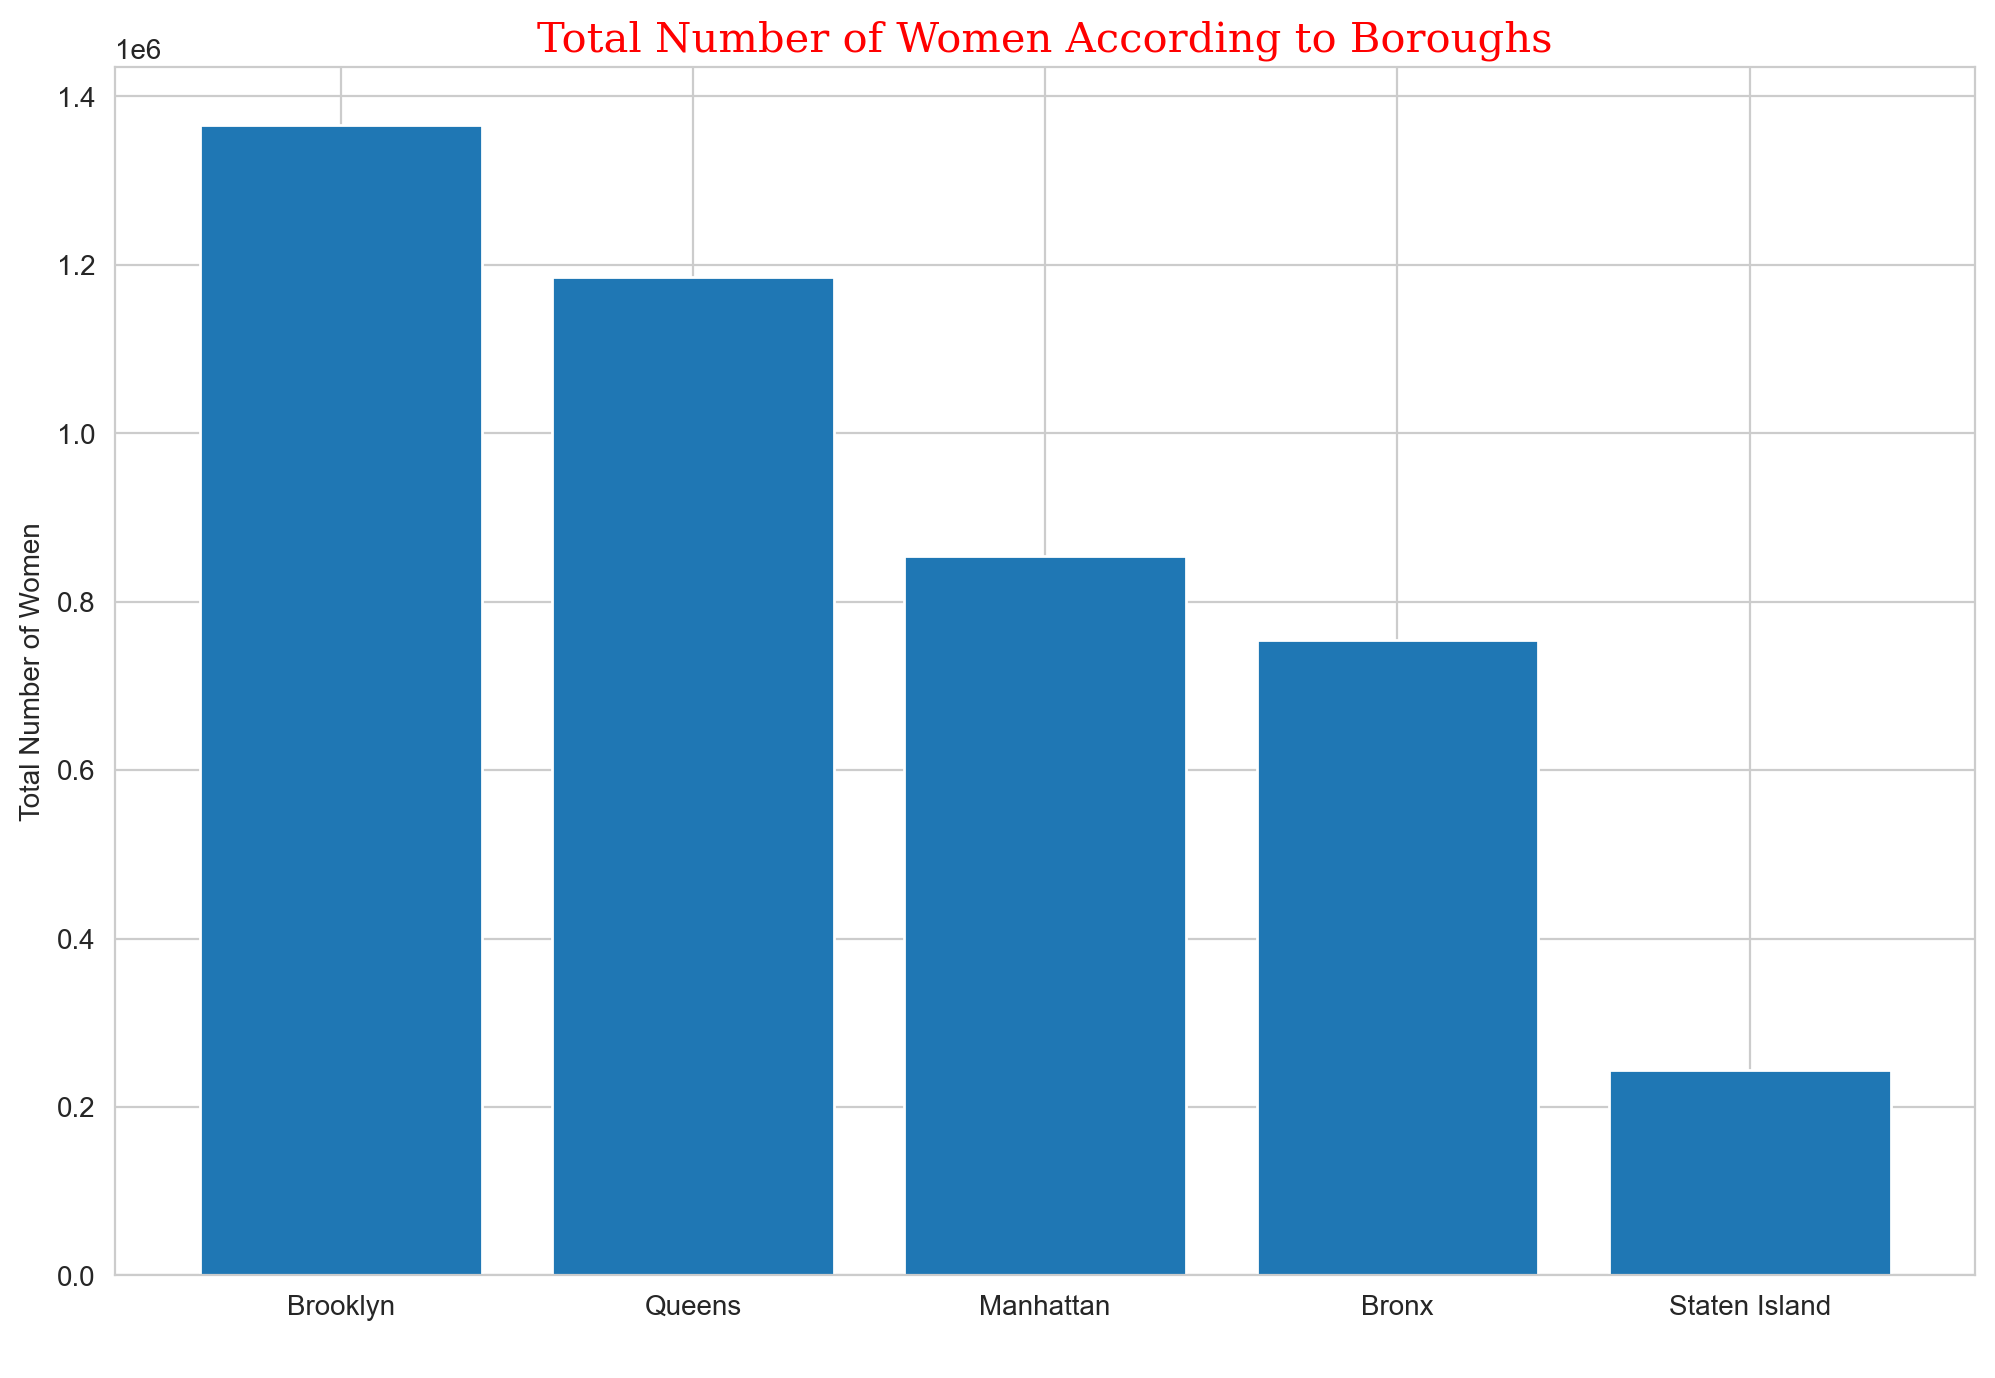

In [26]:
plt.figure(figsize=(12,8),dpi=200)
sns.set_style("whitegrid")
#census_women['Women_Percentage'] = (census_women['Women']/census_women['TotalPop'])*100
plt.bar(census_women.Borough, census_women.Women)
#plt.xticks(rotation=45, ha='right');
plt.xlabel(" ")
plt.ylabel("Total Number of Women")
plt.title("Total Number of Women According to Boroughs", family='serif',fontsize = 15,loc='center',color='r')

Text(0.5, 1.0, 'Total Number of Women According to NYC Boroughs')

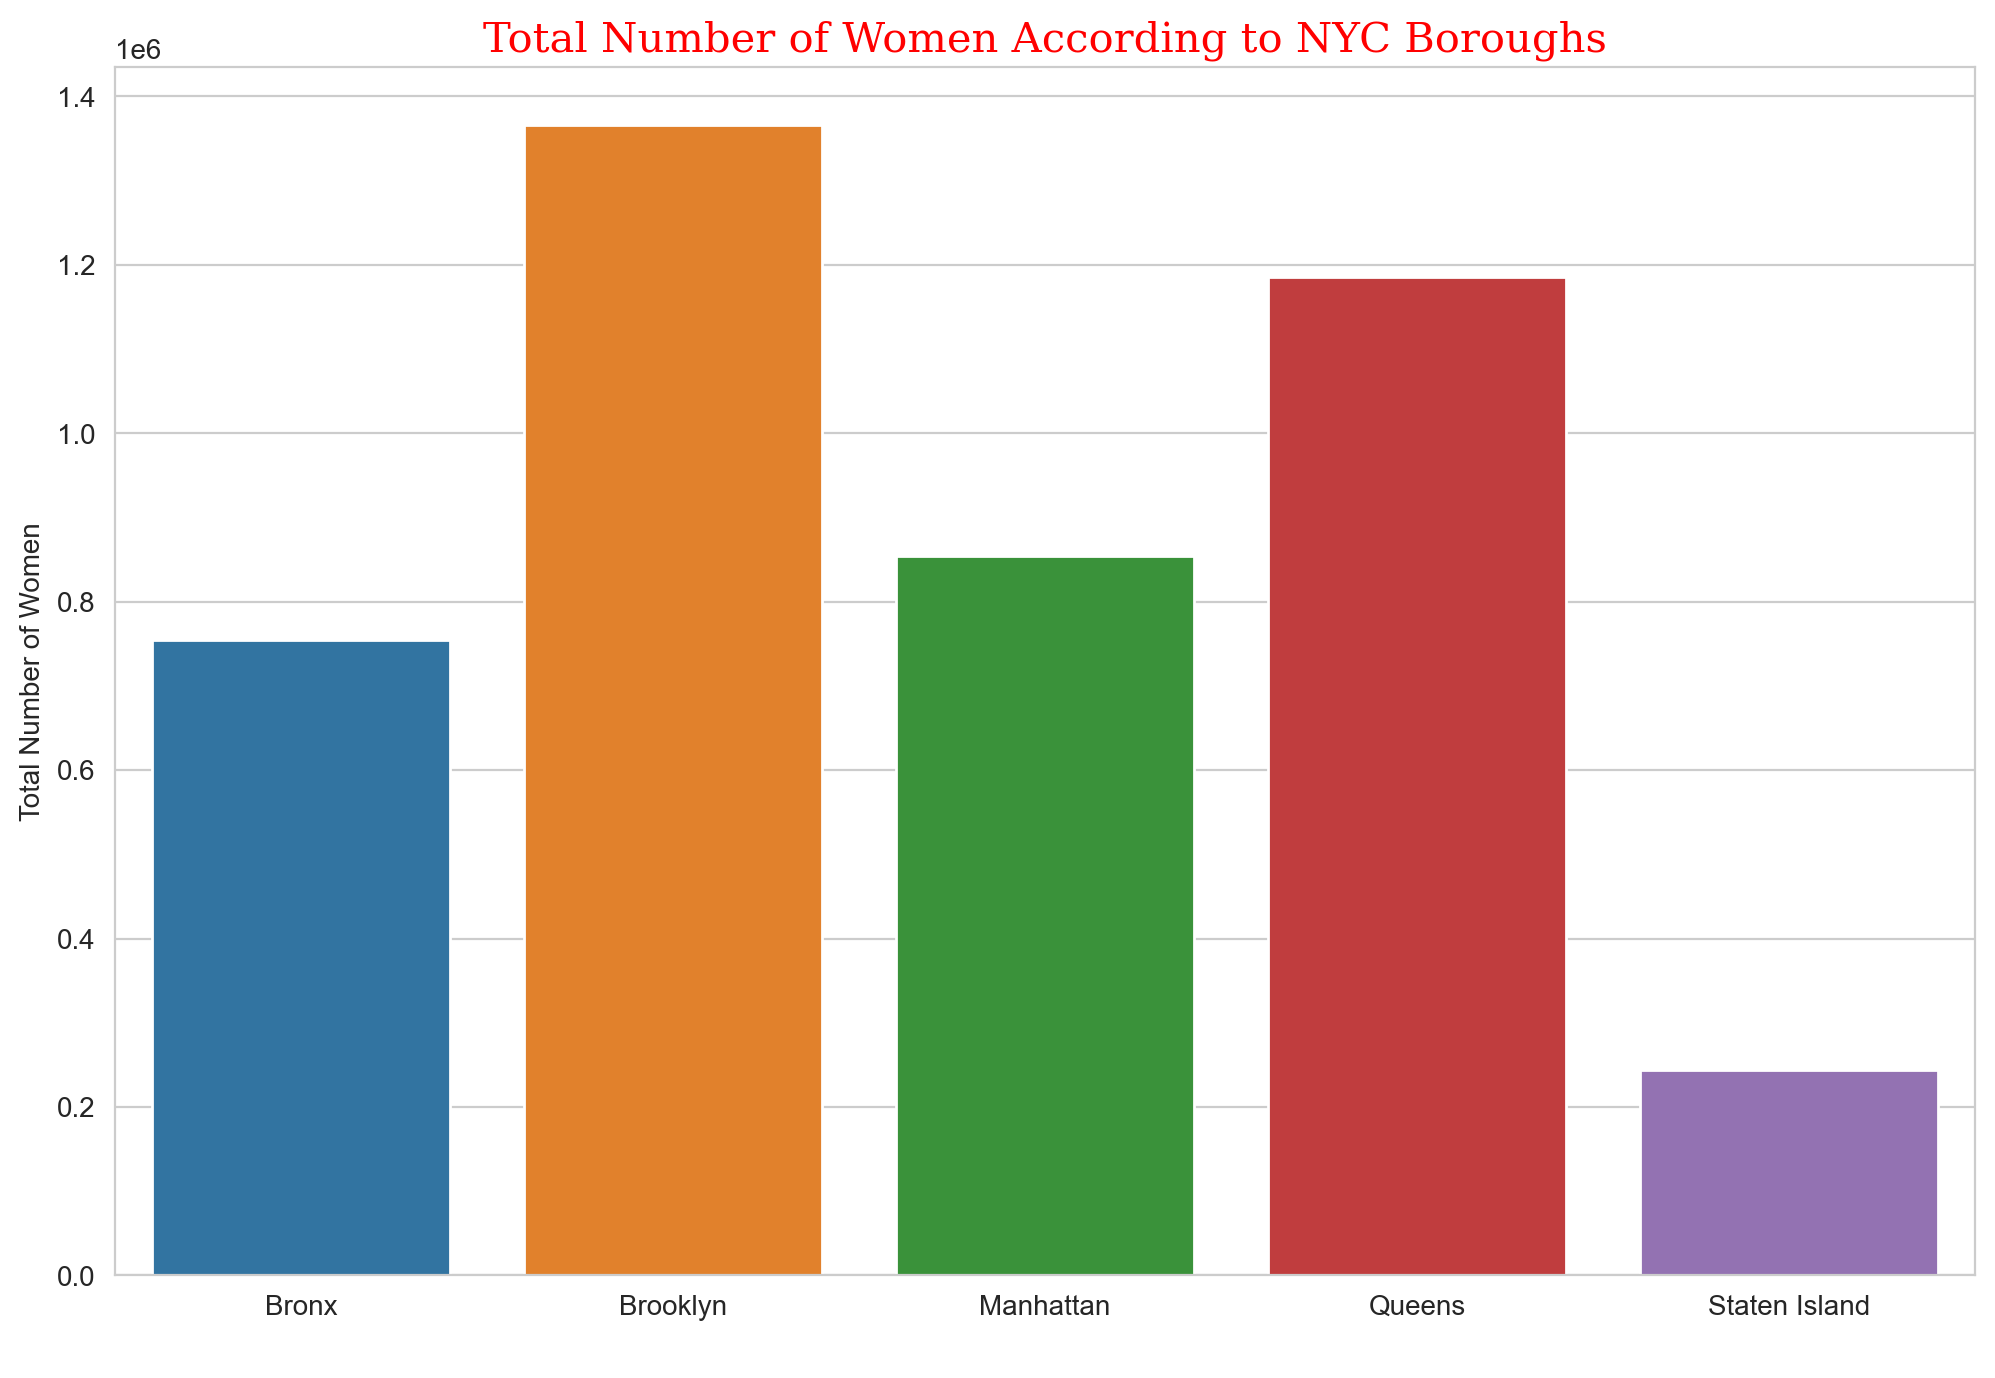

In [27]:
plt.figure(figsize=(12,8),dpi=200)
sns.set_style("whitegrid")
sns.barplot(x = 'Borough', y = 'Women', data = census_women, order= ['Bronx', 'Brooklyn', 'Manhattan','Queens', 'Staten Island'])
plt.ylabel("Total Number of Women")
plt.xlabel(" ")
plt.title("Total Number of Women According to NYC Boroughs", family='serif',fontsize = 15,loc='center',color='r')

In [28]:
census_income = census.groupby("Borough").mean().sort_values("IncomePerCap", ascending = False).reset_index()
census_income.head(10)

,Borough,TotalPop,Men,Women,Income,IncomeErr,IncomePerCap,IncomePerCapErr,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,Manhattan,5875.436364,2770.294545,3105.141818,83351.949091,18248.349091,68894.003636,12261.072727,6.846545,30.798909,3187.970909,83.130909,8.923273,7.777455,0.168727,7.636727
1,Staten Island,4415.345794,2137.373832,2277.971963,72021.233645,13995.672897,31905.570093,4476.411215,2.482243,42.185047,1954.000000,74.235514,21.325234,4.374766,0.069159,7.217757
2,Brooklyn,3466.791444,1640.410428,1826.381016,54264.913102,11949.441176,27863.969251,4698.938503,3.705481,41.889572,1560.727273,78.742914,14.960695,6.196658,0.098396,9.985294
3,Queens,3588.650546,1739.251170,1849.399376,62383.912637,13166.706708,27573.179407,4253.675507,2.495944,42.892668,1723.531981,79.270359,14.400624,6.195788,0.133385,8.739002
4,Bronx,4338.048930,2031.321101,2306.727829,39255.256881,8520.324159,19378.902141,3257.948012,3.265138,42.632416,1722.259939,80.162691,14.501835,5.214679,0.119572,13.907645


Text(0.5, 1.0, 'Average Per Capita Income ($) According to NYC Boroughs')

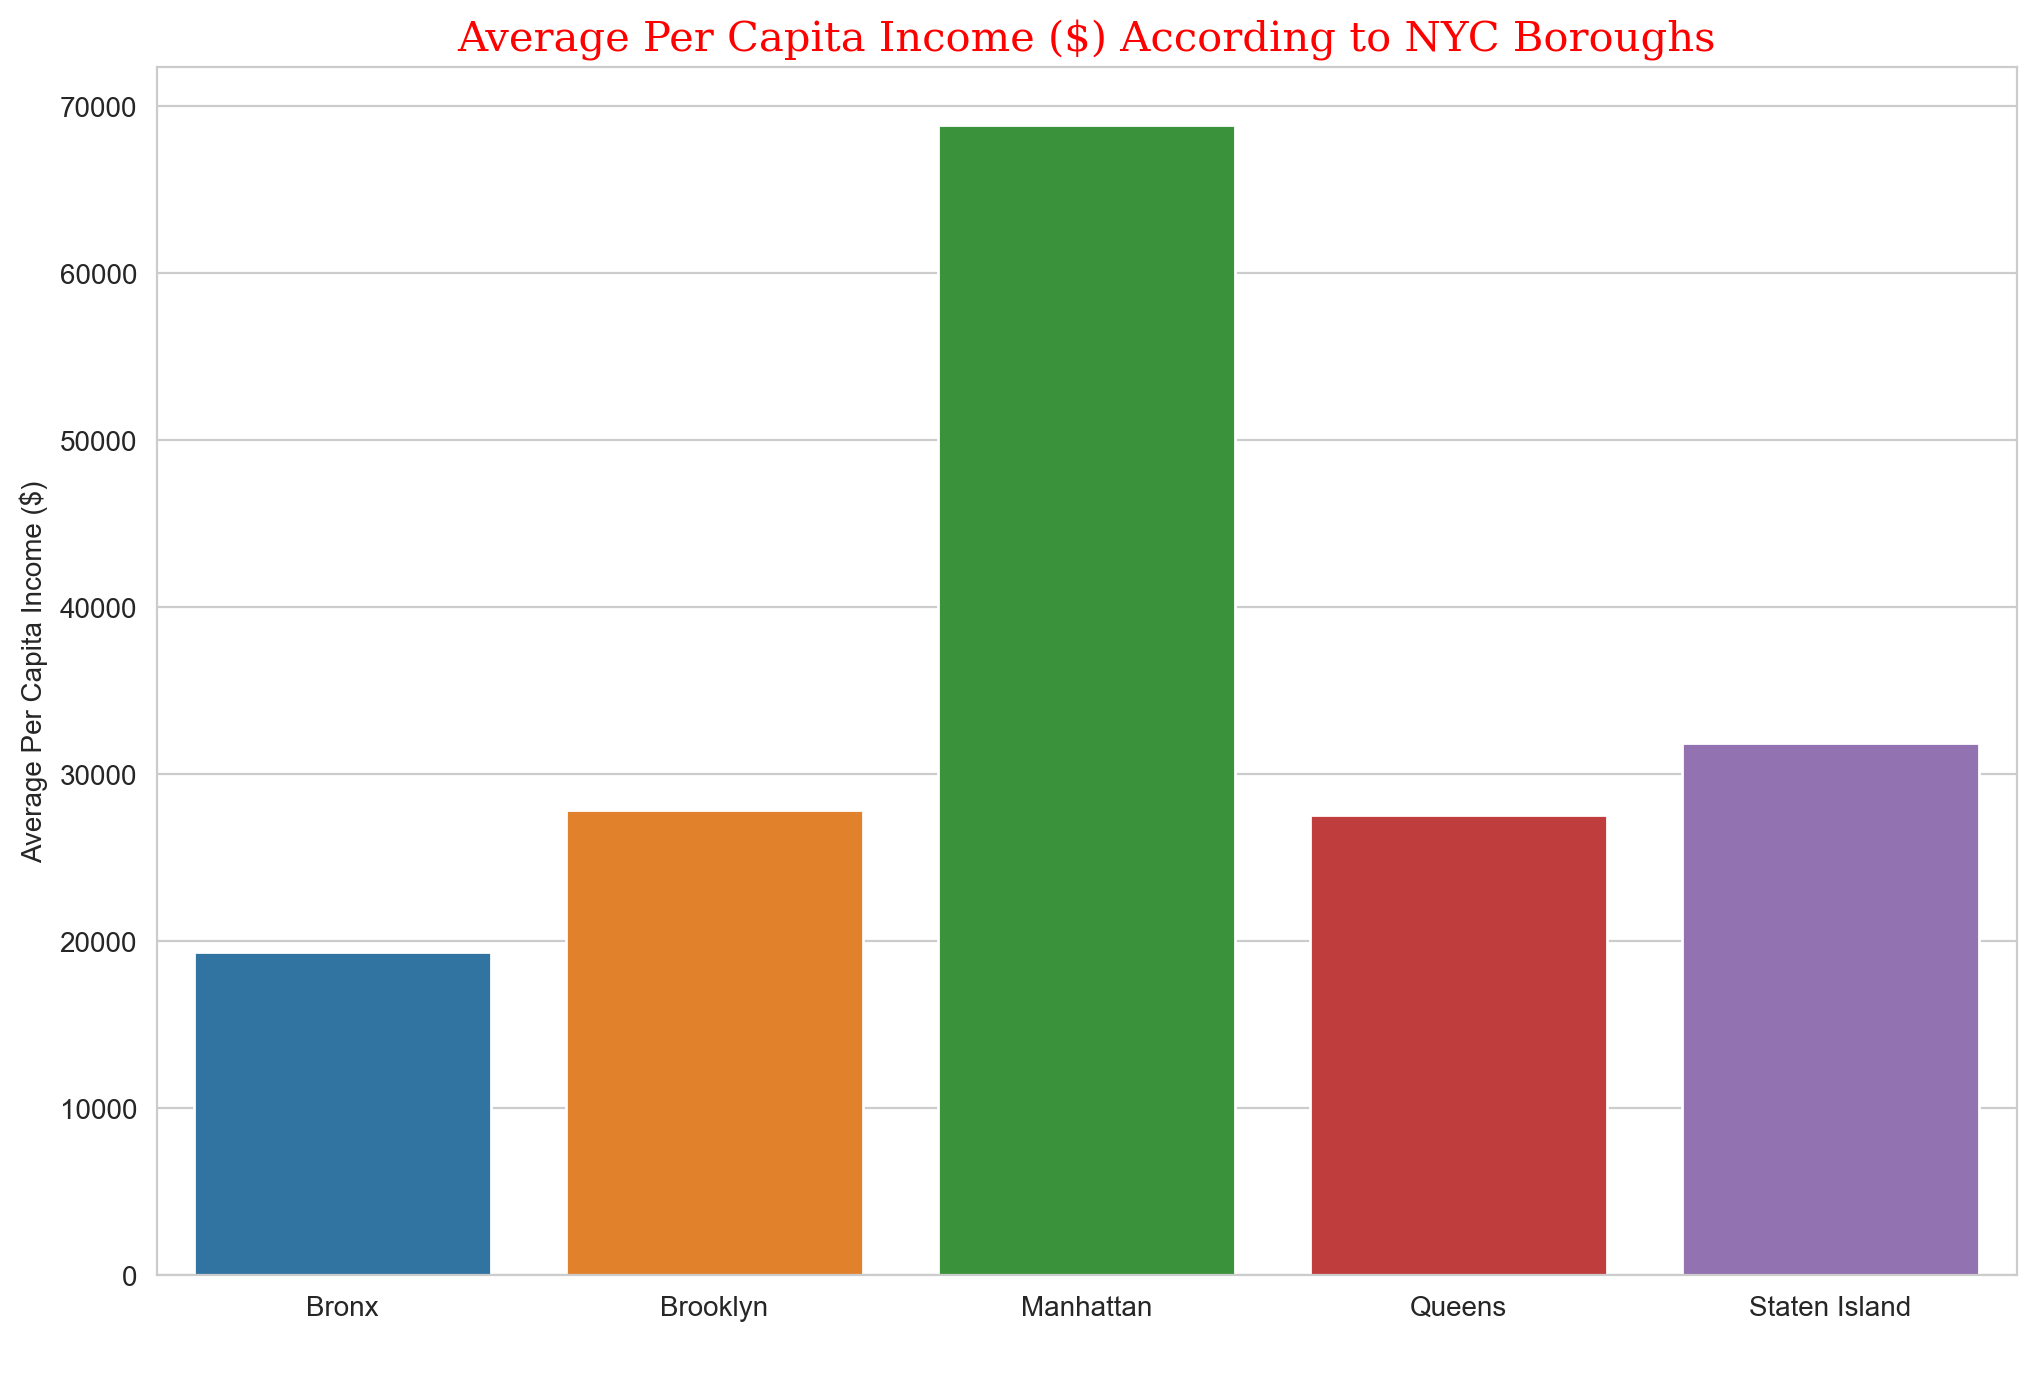

In [29]:
plt.figure(figsize=(12,8),dpi=200)
sns.set_style("whitegrid")
sns.barplot(x = 'Borough', y = 'IncomePerCap', data = census_income, order= ['Bronx', 'Brooklyn', 'Manhattan','Queens', 'Staten Island'])
plt.ylabel("Average Per Capita Income ($)")
plt.xlabel(" ")
plt.title("Average Per Capita Income ($) According to NYC Boroughs", family='serif',fontsize = 15,loc='center',color='r')